In [39]:
import pandas as pd
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
import seaborn as sns
import numpy as np
sns.set(color_codes=True, font_scale=1.2)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%autoreload 2


In [26]:
from heatmap import heatmap, corrplot

In [30]:
data = pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')

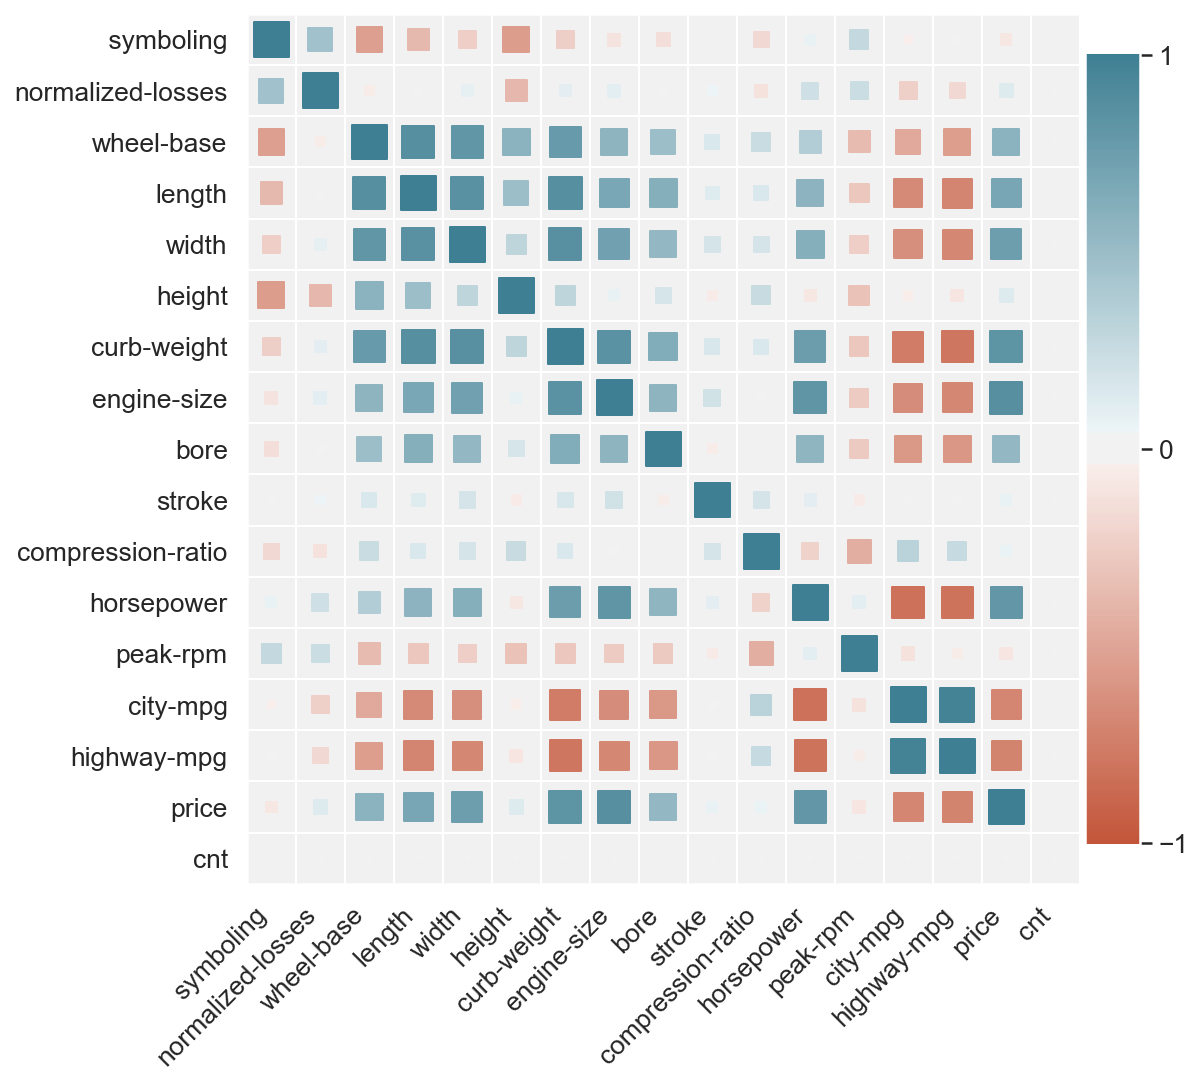

<Figure size 432x288 with 0 Axes>

In [52]:
plt.figure(figsize=(8, 8))
corrplot(data.corr().replace(np.nan, 0), size_scale=300)

plt.figure();

,horsepower-group,drive-wheels,cnt
0,Low (0-100),4wd,5.0
1,Low (0-100),fwd,89.0
2,Low (0-100),rwd,15.0
3,Medium (100-150),4wd,3.0
4,Medium (100-150),fwd,24.0
5,Medium (100-150),rwd,35.0
6,High (150+),4wd,0.0
7,High (150+),fwd,5.0
8,High (150+),rwd,25.0


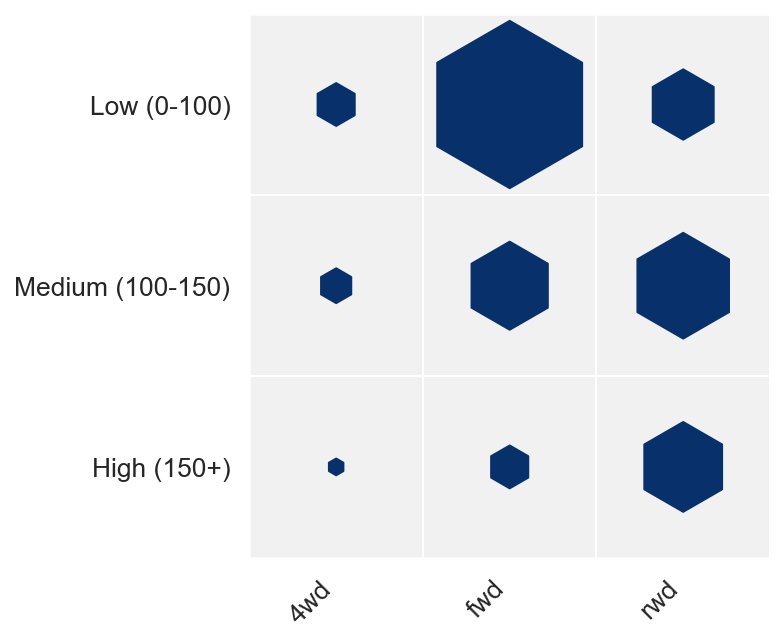

In [85]:
data['cnt'] = np.ones(len(data))
bin_labels = ['Low (0-100)', 'Medium (100-150)', 'High (150+)']

data['horsepower-group'] = pd.cut(data['horsepower'], [0, 100, 150, data['horsepower'].max()], labels=bin_labels)
g = data.groupby(['horsepower-group', 'drive-wheels']).count()[['cnt']].replace(np.nan, 0).reset_index()
display(g)

plt.figure(figsize=(5, 5))

heatmap(
    y=g['horsepower-group'],
    x=g['drive-wheels'],
    size=g['cnt'],
    size_scale=7000,
    x_order=['4wd', 'fwd', 'rwd'],
    y_order=bin_labels[::-1],
    marker='h'
    
#     color=g['cnt'],
#     color_range=[-1, 1],
#     palette=['darkred']
)

# plt.xlabel('Drivetrain layout')
# plt.ylabel('Horsepower');
